### About the dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Importing libraries

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [257]:
dataset = pd.read_csv("C:/Users/nikhi/OneDrive/CODE/PYTHON/Jupyter Notebook/ML PROJECTS/Credit Card Fraud Detection/creditcard.csv")
dataset.head(),

(   Time        V1        V2        V3        V4        V5        V6        V7   
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25   
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [258]:
dataset.shape

(284807, 31)

### Checking missing values

In [259]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [260]:
legit_txns = dataset[dataset['Class']==0]
fraud_txns = dataset[dataset['Class']==1]

In [261]:
print(f"There are total {legit_txns.shape[0]} legit transactions representing with {legit_txns['Class'].unique().item()} and {fraud_txns.shape[0]} fraud transactions representing with {fraud_txns['Class'].unique().item()}.")

There are total 284315 legit transactions representing with 0 and 492 fraud transactions representing with 1.


### Plotting legit and fraud transactions

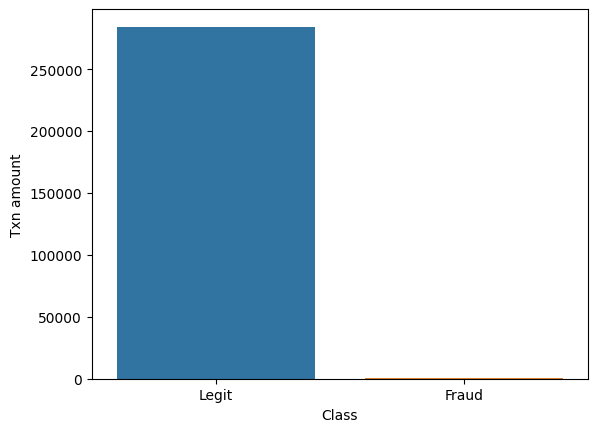

In [262]:
sns.countplot(x='Class', data=dataset, order=dataset['Class'].value_counts().index)
plt.xticks(range(len(dataset['Class'].value_counts())), ['Legit','Fraud'])
plt.ylabel("Txn amount")
plt.show()

In [263]:
fraud_txns.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [264]:
legit_txns['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [265]:
print(f"There are {(fraud_txns[fraud_txns['Amount'] < np.percentile(fraud_txns['Amount'], 25)]).shape[0]} number of legit transactions in the dataset whose transaction amount is less than or equal to $5.65.")

There are 68 number of legit transactions in the dataset whose transaction amount is less than or equal to $5.65.


It is a highly imbalanced dataset in which one class is much more prevalent than the others. This can make it difficult for machine learning models to learn to identify the minority class, as they are often overshadowed by the majority class.

There are a number of techniques that can be used to deal with highly imbalanced datasets. These include:

**- Oversampling:** This involves artificially increasing the number of samples in the minority class. This can be done by duplicating existing samples or by generating new samples or by using a technique called SMOTE (Synthetic Minority Oversampling Technique).

**- Undersampling:** This involves reducing the number of samples in the majority class. This can be done by randomly removing samples.

**- Cost-sensitive learning:** This involves assigning different costs to misclassifications of different classes. This can help the model to focus on identifying the minority class, as misclassifications of this class are more costly.

***Here we're using Undersampling technique in which we're reducing the number of samples from majority class.***

In [266]:
legit_txns_sample = legit_txns.sample(n=492)

legit.sample(n=492) randomly selects 492 samples from the legit_txns dataset. By doing so, it is effectively reducing the number of samples in the majority class (legit) to balance it with the number of samples in the minority class (assuming there is a minority class).

In [267]:
print(f'Now, we have {legit_txns_sample.shape[0]} legit and {fraud_txns.shape[0]} fraud transactions.')

Now, we have 492 legit and 492 fraud transactions.


We're concatenating both datasets for training our model

In [268]:
new_dataset = pd.concat([legit_txns_sample, fraud_txns], axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94185,64772.0,-1.161723,0.202478,1.693271,-0.276490,0.842557,-1.355750,0.229176,0.118841,-0.651196,...,-0.083887,-0.629469,0.073801,0.460505,-0.206136,-0.086076,0.008153,0.121431,1.29,0
138847,82880.0,-1.356602,1.555302,0.406514,-0.052373,-0.559032,-0.346228,-0.290551,1.165715,-0.554232,...,-0.151800,-0.644118,0.131401,-0.082008,-0.221765,0.099395,0.115089,0.002685,12.57,0
277526,167695.0,1.885297,0.495467,-0.514183,3.909907,0.389783,0.177124,0.105277,-0.039336,-0.742316,...,0.105140,0.473838,0.162045,1.094562,0.104431,0.042470,-0.024940,-0.039349,7.56,0
96630,65859.0,-0.527327,1.291105,0.963021,-0.119288,0.236783,-0.688669,0.698218,-0.029594,-0.168741,...,-0.330228,-0.809040,-0.066726,-0.208076,-0.036445,0.110029,0.352491,0.152243,4.56,0
9566,14365.0,-0.519898,0.546495,1.718019,-0.133008,0.426190,0.647543,0.005937,0.193023,1.075744,...,-0.338922,-0.847861,-0.164876,-1.381703,-0.138877,1.050518,-0.026583,0.049700,25.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


### Separating Features and Labels

In [269]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [270]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
94185,64772.0,-1.161723,0.202478,1.693271,-0.276490,0.842557,-1.355750,0.229176,0.118841,-0.651196,...,0.057058,-0.083887,-0.629469,0.073801,0.460505,-0.206136,-0.086076,0.008153,0.121431,1.29
138847,82880.0,-1.356602,1.555302,0.406514,-0.052373,-0.559032,-0.346228,-0.290551,1.165715,-0.554232,...,-0.108875,-0.151800,-0.644118,0.131401,-0.082008,-0.221765,0.099395,0.115089,0.002685,12.57
277526,167695.0,1.885297,0.495467,-0.514183,3.909907,0.389783,0.177124,0.105277,-0.039336,-0.742316,...,-0.266366,0.105140,0.473838,0.162045,1.094562,0.104431,0.042470,-0.024940,-0.039349,7.56
96630,65859.0,-0.527327,1.291105,0.963021,-0.119288,0.236783,-0.688669,0.698218,-0.029594,-0.168741,...,0.256285,-0.330228,-0.809040,-0.066726,-0.208076,-0.036445,0.110029,0.352491,0.152243,4.56
9566,14365.0,-0.519898,0.546495,1.718019,-0.133008,0.426190,0.647543,0.005937,0.193023,1.075744,...,0.142039,-0.338922,-0.847861,-0.164876,-1.381703,-0.138877,1.050518,-0.026583,0.049700,25.36


In [271]:
y.head()

94185     0
138847    0
277526    0
96630     0
9566      0
Name: Class, dtype: int64

### Splitting Training and Testing data

In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [273]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06
247892,153727.0,-1.155463,-0.063567,1.787055,-2.525243,-0.326768,1.949911,-0.830302,0.765810,0.926058,...,0.391079,0.124634,1.073392,-0.144365,-1.432843,-0.397355,-0.198558,0.621663,0.153941,3.00
120987,76036.0,-0.655476,1.373978,1.221612,0.840904,0.027613,-0.236808,0.342512,0.380338,-0.986734,...,-0.060091,0.143627,0.408524,-0.075513,0.107222,-0.252732,-0.388729,0.062786,0.085067,2.49
180056,124358.0,-1.556966,1.205238,-0.946492,-0.660355,1.023493,-0.873270,1.051299,-0.313142,0.742400,...,-0.245978,-0.386318,-0.566692,0.524012,0.485989,-0.980489,-0.009384,0.097562,0.482072,20.90
224830,143981.0,1.965158,-0.469675,-0.243495,0.532411,-0.863099,-0.554817,-0.663147,0.003439,1.581769,...,-0.276215,0.191299,0.780946,0.134946,-0.008444,-0.137623,-0.207572,0.040017,-0.038413,9.99


In [274]:
y_train.head()

100623    1
247892    0
120987    0
180056    0
224830    0
Name: Class, dtype: int64

### Building Model

In [275]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [276]:
from sklearn.metrics import accuracy_score

### Prediction and its accuracy for training data

In [277]:
X_train_pred = lr.predict(X_train)
print(accuracy_score(y_train, X_train_pred))

0.951715374841169


### Prediction and its accuracy for testing data

In [278]:
X_test_pred = lr.predict(X_test)
print(accuracy_score(y_test, X_test_pred))

0.9390862944162437
